In [8]:
import lightkurve as lk
from lightkurve import search_targetpixelfile
tpf = search_targetpixelfile('249914869', mission='K2').download()

In [9]:
tpf

KeplerTargetPixelFile Object (ID: 249914869)

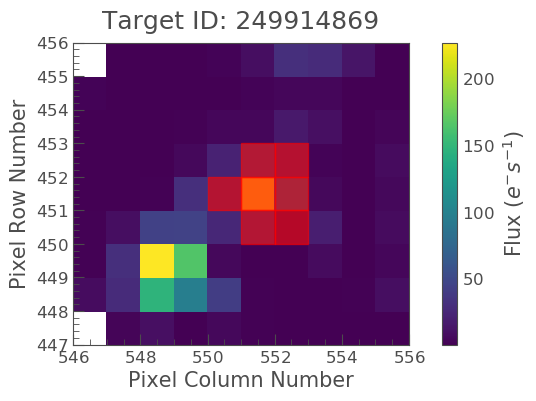

In [10]:
%matplotlib inline
tpf.plot(aperture_mask=tpf.pipeline_mask, mask_color='red')

(0.9, 1.1)

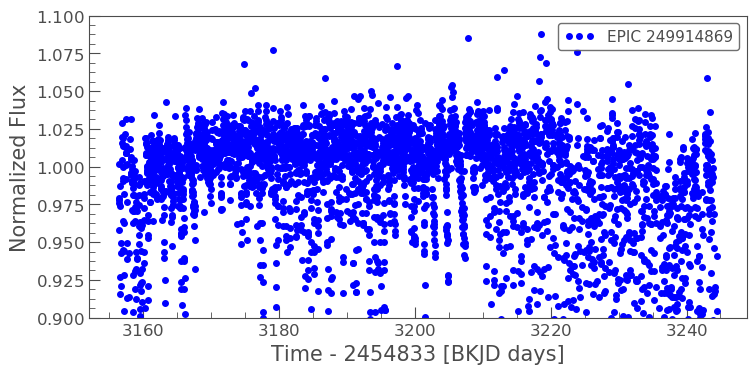

In [11]:
import matplotlib.pyplot as plt

user_lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask.astype(bool))
# Clean the light curve
user_lc = user_lc.remove_nans().remove_outliers()
user_lc.plot(marker='o',linestyle='None',markersize=4,color='blue')
plt.ylim(0.9,1.1)

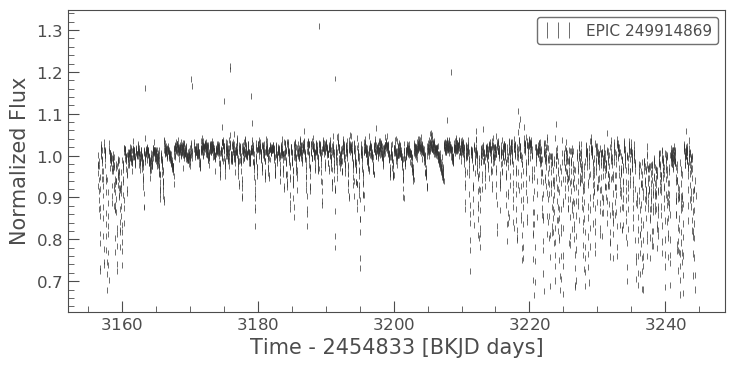

In [12]:
user_lc.errorbar();

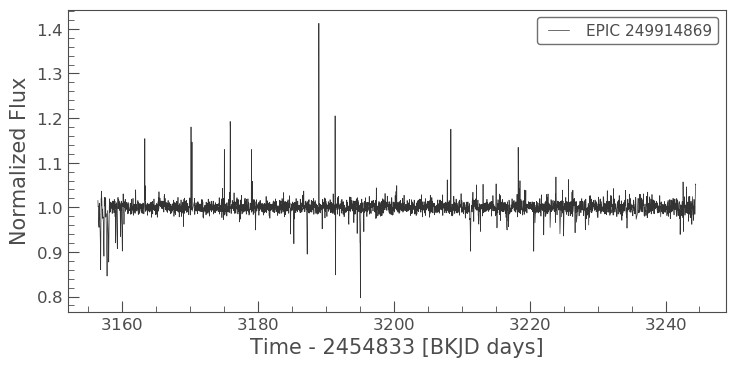

In [13]:
corrector = lk.correctors.SFFCorrector(user_lc)
new_lc_sff = corrector.correct(user_lc.centroid_col,user_lc.centroid_row)

new_lc_sff.plot()

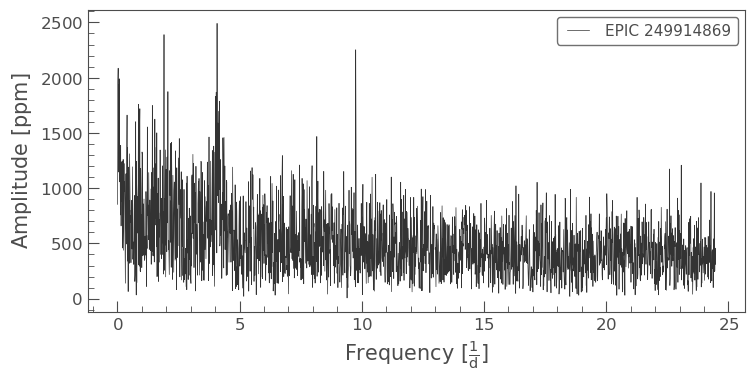

In [14]:
pg_sff = new_lc_sff.to_periodogram(oversample_factor=1)
pg_sff.plot()

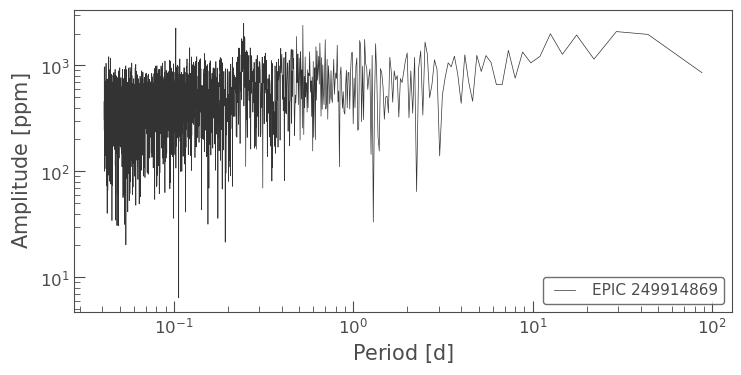

In [15]:
pg_sff.plot(view='period', scale='log')

Best period: 0.24512473598373424 d


(0.9, 1.1)

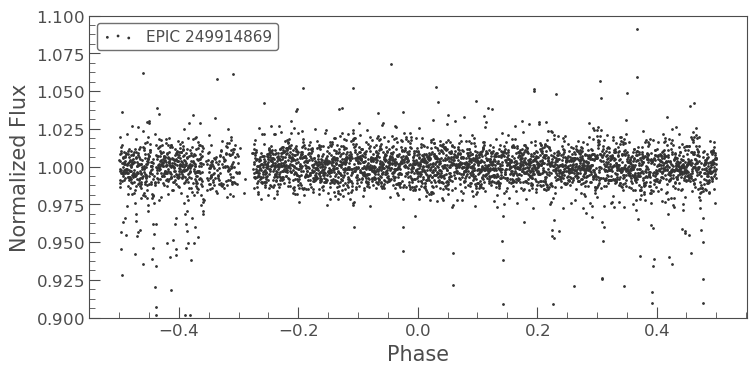

In [16]:
period = pg_sff.period_at_max_power
print('Best period: {}'.format(period))
new_lc_sff.fold(period.value).scatter();
plt.ylim(0.9,1.1)

Best period: 0.980498943934937 d


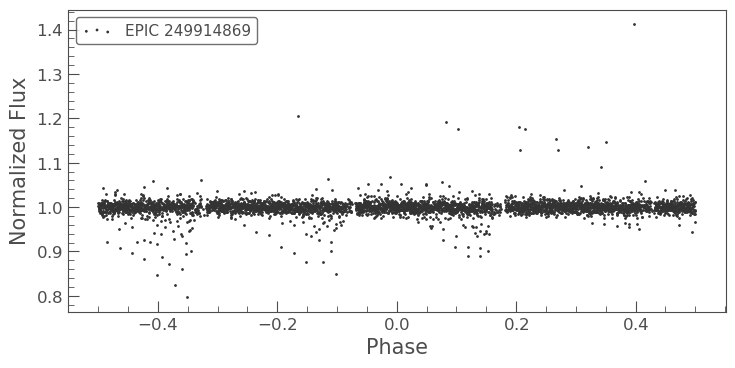

In [17]:
period = pg_sff.period_at_max_power * 4
print('Best period: {}'.format(period))
new_lc_sff.fold(period.value).scatter();

In [18]:
import astropy.units as u
pg_sff = new_lc_sff.to_periodogram(minimum_period=0.9*u.day, maximum_period=1.2*u.day, oversample_factor=10)

Best period: 1.0913598193764056 d


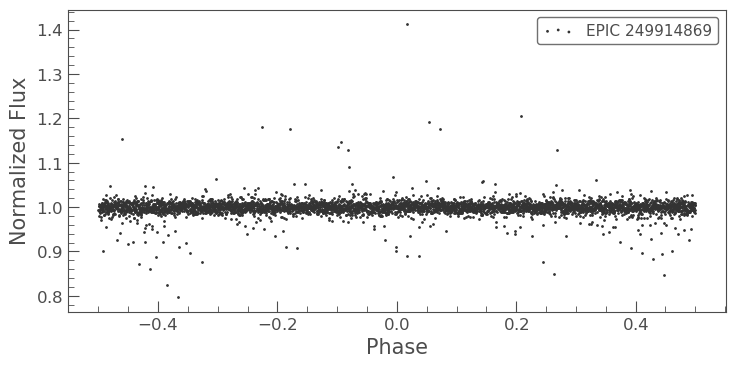

In [19]:
period = pg_sff.period_at_max_power
print('Best period: {}'.format(period))
new_lc_sff.fold(period.value).scatter();

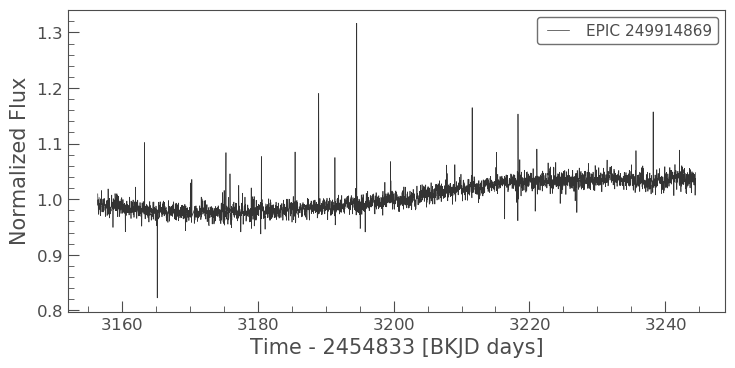

In [20]:
#PLD Corrector
corrector = lk.PLDCorrector(tpf) # doctest: +SKIP
new_lc_pld = corrector.correct() # doctest: +SKIP

new_lc_pld.plot()

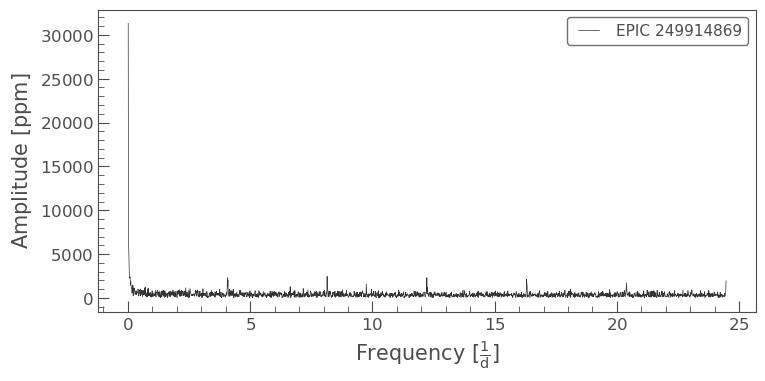

In [21]:
#PLD Periodogram
pg_pld = new_lc_pld.to_periodogram(oversample_factor=1)
pg_pld.plot()

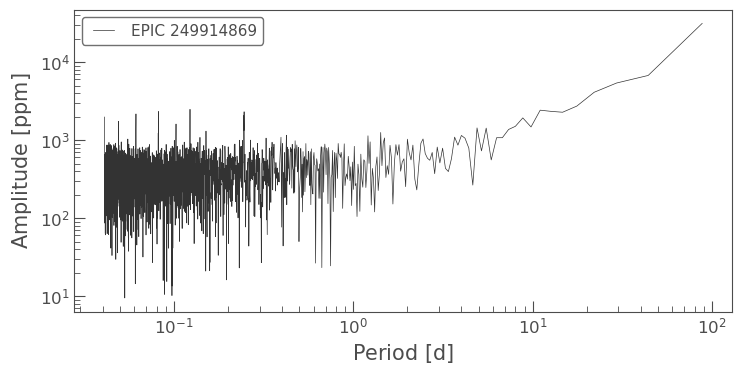

In [22]:
pg_pld.plot(view='period', scale='log')

Best period: 87.9997802181606 d


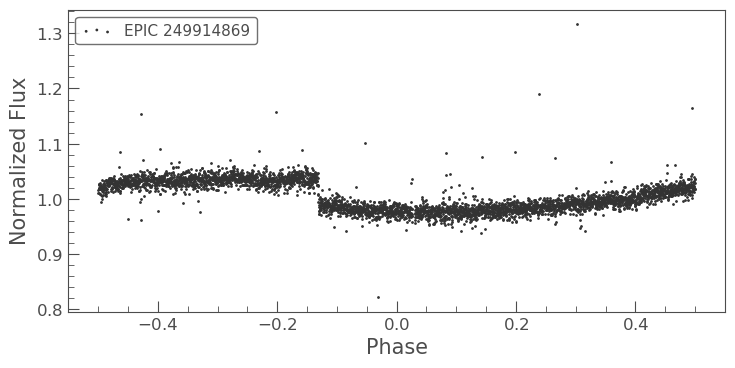

In [23]:
period = pg_pld.period_at_max_power
print('Best period: {}'.format(period))
new_lc_pld.fold(period.value).scatter();

Best period: 351.9991208726424 d


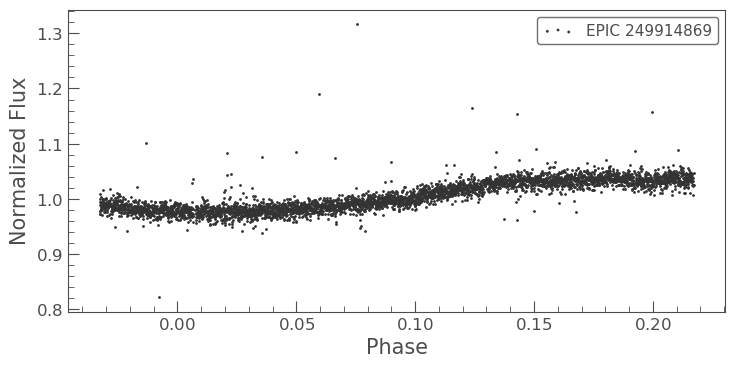

In [24]:
period = pg_pld.period_at_max_power * 4
print('Best period: {}'.format(period))
new_lc_pld.fold(period.value).scatter();

In [25]:
import astropy.units as u
pg_pld = new_lc_pld.to_periodogram(minimum_period=0.9*u.day, maximum_period=1.2*u.day, oversample_factor=10)

Best period: 1.2 d


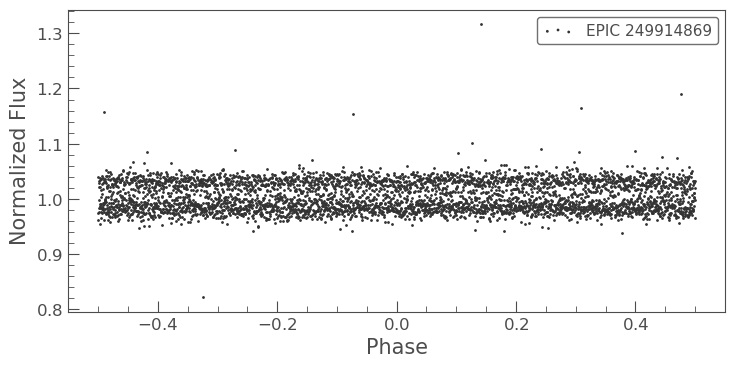

In [26]:
period = pg_pld.period_at_max_power
print('Best period: {}'.format(period))
new_lc_pld.fold(period.value).scatter();